**Подключение библиотек и скриптов**

In [60]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV

%matplotlib inline

In [61]:
import warnings
warnings.filterwarnings('ignore')

**Пути к директориям и файлам**

In [62]:
TRAIN_DATASET_PATH = 'C:\\Users\\Coolver\\Desktop\\CP\\train.csv'
TEST_DATASET_PATH = 'C:\\Users\\Coolver\\Desktop\\CP\\test.csv'

# Загрузка данных

Описание датасета:
* Id - идентификационный номер квартиры
* DistrictId - идентификационный номер района
* Rooms - количество комнат
* Square - площадь
* LifeSquare - жилая площадь
* KitchenSquare - площадь кухни
* Floor - этаж
* HouseFloor - количество этажей в доме
* HouseYear - год постройки дома
* Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
* Social_1, Social_2, Social_3 - социальные показатели местности
* Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
* Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
* Price - цена квартиры

In [63]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, index_col='Id')
test_df = pd.read_csv(TEST_DATASET_PATH, index_col='Id')

# Получение информации о данных

In [64]:
train_df.shape, test_df.shape

((10000, 19), (5000, 18))

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(8), object(3)
memory usage: 1.5+ MB


In [66]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(8), object(3)
memory usage: 742.2+ KB


In [67]:
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


# Обработка категориальных признаков

In [68]:
train_df['DistrictId'] = train_df['DistrictId'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str) 

In [69]:
feature_bin_names = ['Ecology_2', 'Ecology_3', 'Shops_2']

train_df[feature_bin_names] = train_df[feature_bin_names].replace({'A':0, 'B':1})
test_df[feature_bin_names] = test_df[feature_bin_names].replace({'A':0, 'B':1})

In [70]:
train_df.head(10)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644
12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,1,1,35,7715,4,990.0,0,6,1,215898.447742
14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,1,1,20,4386,14,NaN,1,5,1,296021.204377
11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,1,1,6,1437,3,NaN,0,2,1,221244.156664
5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,1,1,1,264,0,NaN,0,1,1,229102.795999


# Обработка пропусков

In [71]:
train_df.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [72]:
train_df.loc[train_df['LifeSquare'].isna(), 'LifeSquare'] = \
    train_df['Square'] - train_df['KitchenSquare']
test_df.loc[test_df['LifeSquare'].isna(), 'LifeSquare'] = \
    test_df['Square'] - test_df['KitchenSquare']

In [73]:
train_df.loc[train_df['Healthcare_1'].isna(), 'Healthcare_1'] = train_df['Healthcare_1'].median()
test_df.loc[test_df['Healthcare_1'].isna(), 'Healthcare_1'] = train_df['Healthcare_1'].median()

# Обработка выбросов

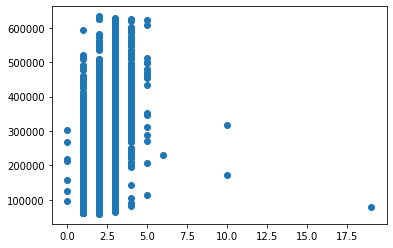

In [74]:
plt.scatter(train_df['Rooms'], train_df['Price']);

In [75]:
#Удаляем строки, в которых значение Rooms больше 5
train_df.drop(train_df[train_df['Rooms'] > 5].index, inplace=True)

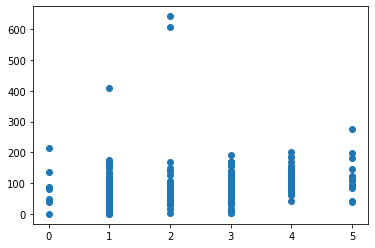

In [76]:
plt.scatter(train_df['Rooms'], train_df['Square']);

In [77]:
#Удаляем строки, в которых значение Square меньше 10 и больше 600
train_df.drop(train_df[(train_df['Square'] < 10) | (train_df['Square'] > 400)].index, inplace=True)

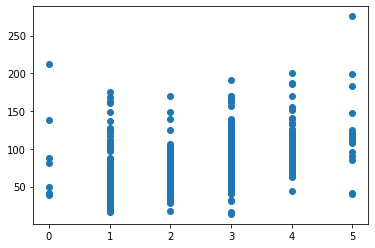

In [78]:
plt.scatter(train_df['Rooms'], train_df['Square']);

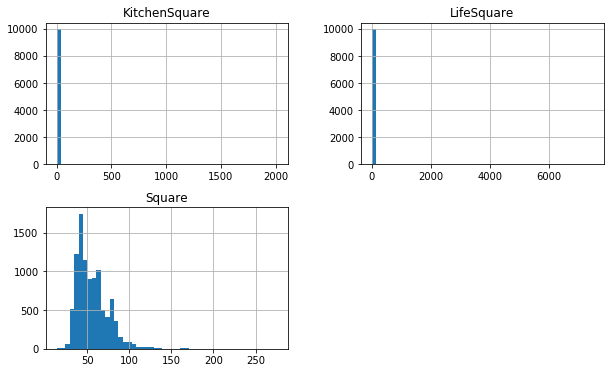

In [79]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].hist(figsize=(10,6), bins=50, grid=True);

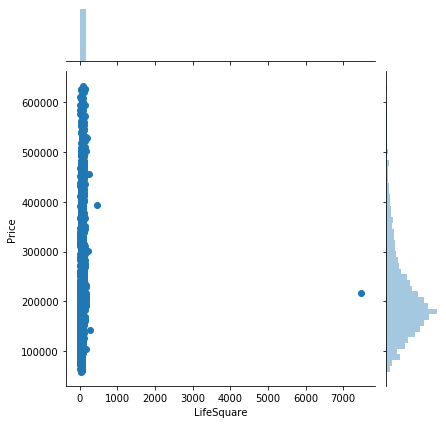

In [80]:
sns.jointplot(train_df['LifeSquare'], train_df['Price'], kind='scatter', height=6);

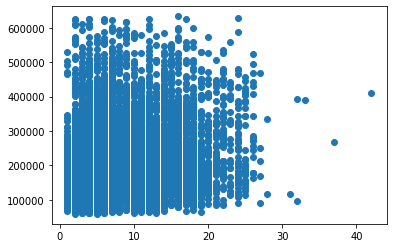

In [81]:
plt.scatter(train_df['Floor'], train_df['Price']);

In [82]:
#Удаляем строки, в которых значение HouseFloor больше 90
train_df.drop(train_df[train_df['HouseFloor'] > 90].index, inplace=True)

In [83]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].describe()

,Square,LifeSquare,KitchenSquare
count,9978.000000,9978.000000,9978.000000
mean,56.228436,41.670991,6.279615
std,19.082390,77.376916,28.591505
min,13.784865,0.370619,0.000000
25%,41.784558,25.544820,1.000000
50%,52.535436,37.040829,6.000000
75%,65.907611,49.804738,9.000000
max,275.645284,7480.592129,2014.000000


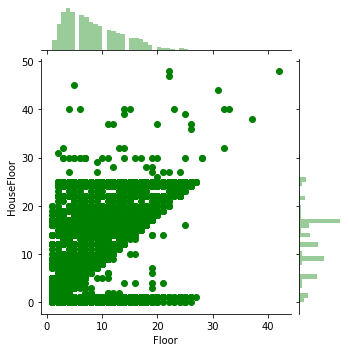

In [84]:
sns.jointplot(train_df['Floor'], train_df['HouseFloor'], kind='scatter', height=5, color='g');

In [85]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].mode()[0]
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].mode()[0]

# Отбор признаков

In [86]:
target_name = ['Price']
feature_names = [
             'DistrictId',
             'Rooms',
             'Square',
#             'LifeSquare',
             'KitchenSquare',
             'Floor',
             'HouseFloor',
             'HouseYear',
             'Ecology_1',
             'Ecology_2',
             'Ecology_3',
             'Social_1',
             'Social_2',
             'Social_3',
             'Healthcare_1',
             'Helthcare_2',
             'Shops_1',
             'Shops_2'
]

In [87]:
X = train_df[feature_names]
y = train_df[target_name]

X_test = test_df[feature_names]

In [88]:
boost = GradientBoostingRegressor(n_estimators=400, max_depth=5, random_state=42)

kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_score = cross_val_score(boost, X, y, scoring='r2', cv=kf)
print('R2: {:.5f}'.format(cv_score.mean()))

R2: 0.74672


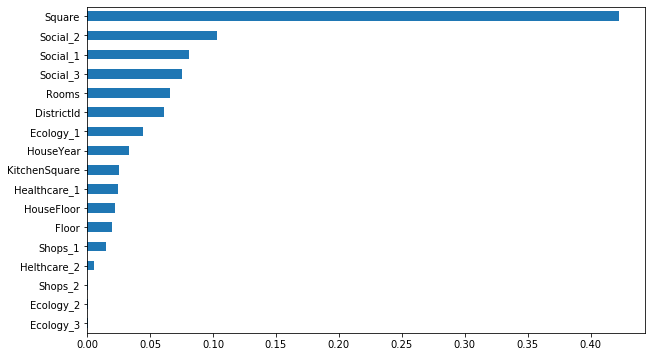

In [89]:
boost.fit(X, y)
importances = boost.feature_importances_
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values(ascending=True, inplace=True)

feat_importances.plot(kind='barh', figsize=(10, 6));

In [90]:
y_pred = boost.predict(X_test)
preds = pd.DataFrame()
preds['Id'] = X_test.index
preds['Price'] = y_pred
boost.score(X, y)

0.9232306555401933

In [91]:
preds.to_csv('LILeftor_predictions001.csv', index=False)